In [1]:
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

In [4]:
ids = [i for i in range(1,51)]

In [5]:
folds = np.array_split(ids, 1)

In [6]:
len(folds)

1

In [7]:
folds

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])]

## Make fold CSVs for real data

In [5]:
img_dir = "/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_images"
mask_dir = "/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks"

In [6]:
def make_df(img_dir, mask_dir, fold_ids):

    df = pd.DataFrame(columns=["image_path", "mask_path"])
    
    

    for data_id in fold_ids:

        img_path = os.path.join(img_dir, str(data_id) + ".jpg")
        mask_path = os.path.join(mask_dir, str(data_id) + ".jpg")

        if os.path.exists(img_path) and os.path.exists(mask_path):

            df = df.append({"image_path": img_path,
                            "mask_path": mask_path
                            }, ignore_index=True)
        else:
            print("Found mismatch files")
            print("Image path=", img_path)
            print("mask_path", mask_path)

    return df

In [8]:
def make_and_save_folds(img_dir, mask_dir, folds_id_array, basic_name="REAL"):
    
    for f in range(len(folds_id_array)):
        fold_ids = folds_id_array[f]
        df = make_df(img_dir, mask_dir, fold_ids)
        
        df.to_csv(f"{basic_name}_fold_{f}.csv", index=False, header=True)

In [9]:
make_and_save_folds(img_dir, mask_dir, folds, basic_name="REAL")

## Make CSVs for 5 images builds

In [7]:
#df = make_df(img_dir, mask_dir, folds[0])

In [14]:
#df.to_csv("test.csv",index=False, header=True)

## MAKE CVC-clinicdb csvs

In [2]:
img_dir = "/work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/Original"
mask_dir = "/work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/ground_truth"

In [3]:
from skimage import io

In [4]:
def make_df(img_dir, mask_dir):

    df = pd.DataFrame(columns=["image_path", "mask_path"])
    
    

    for img_name in tqdm(os.listdir(img_dir)):

        img_path = os.path.join(img_dir, str(img_name))
        mask_path = os.path.join(mask_dir, str(img_name))
        
        # converting tif to png
        img = io.imread(img_path)
        mask = io.imread(mask_path)
        
        img_path_png = img_path.split(".")[0] + ".png"
        mask_path_png = mask_path.split(".")[0] + ".png"
        
        io.imsave(img_path_png, img)
        io.imsave(mask_path_png, mask)
        
        os.remove(img_path)
        os.remove(mask_path)
        

        if os.path.exists(img_path_png) and os.path.exists(mask_path_png):
            

            df = df.append({"image_path": img_path_png,
                            "mask_path": mask_path_png
                            }, ignore_index=True)
        else:
            print("Found mismatch files")
            print("Image path=", img_path_png)
            print("mask_path", mask_path_png)

    return df

In [5]:
def make_and_save_folds(img_dir, mask_dir, basic_name="CVC_Clinic_DB"):
        df = make_df(img_dir, mask_dir)
        df.to_csv(f"{basic_name}.csv", index=False, header=True)

In [6]:
make_and_save_folds(img_dir, mask_dir, basic_name="CVC_Clinic_DB")

  0%|          | 2/612 [00:00<00:53, 11.34it/s]<ipython-input-4-3f28fee3502a>:20: UserWarning: /work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/ground_truth/51.png is a low contrast image
  io.imsave(mask_path_png, mask)
  8%|▊         | 50/612 [00:03<00:43, 13.03it/s]<ipython-input-4-3f28fee3502a>:20: UserWarning: /work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/ground_truth/375.png is a low contrast image
  io.imsave(mask_path_png, mask)
 17%|█▋        | 104/612 [00:08<00:39, 12.72it/s]<ipython-input-4-3f28fee3502a>:20: UserWarning: /work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/ground_truth/154.png is a low contrast image
  io.imsave(mask_path_png, mask)
 18%|█▊        | 110/612 [00:08<00:39, 12.68it/s]<ipython-input-4-3f28fee3502a>:20: UserWarning: /work/vajira/DATA/sinGAN_polyps/cvc_clinic_db/CVC-ClinicDB/ground_truth/71.png is a low contrast image
  io.imsave(mask_path_png, mask)
 34%|███▎      | 206/612 [00:16<00:31, 13.02it/s]<ipython-input-4-3f2

## MAKE CSV of ETIS_Larib

In [7]:
img_dir = "/work/vajira/DATA/sinGAN_polyps/ETIS-Larib/ETIS-LaribPolypDB/ETIS-LaribPolypDB"
mask_dir = "/work/vajira/DATA/sinGAN_polyps/ETIS-Larib/ETIS-LaribPolypDB/ground_truth"

In [8]:
from skimage import io

In [9]:
def make_df(img_dir, mask_dir):

    df = pd.DataFrame(columns=["image_path", "mask_path"])
    
    

    for img_name in tqdm(os.listdir(img_dir)):

        img_path = os.path.join(img_dir, str(img_name))
        mask_path = os.path.join(mask_dir, "p"+str(img_name)) # check the dataset to know why "p"
        
        # converting tif to png
        img = io.imread(img_path)
        mask = io.imread(mask_path)
        
        img_path_png = img_path.split(".")[0] + ".png"
        mask_path_png = mask_path.split(".")[0] + ".png"
        
        io.imsave(img_path_png, img)
        io.imsave(mask_path_png, mask)
        
        os.remove(img_path)
        os.remove(mask_path)
        

        if os.path.exists(img_path_png) and os.path.exists(mask_path_png):
            

            df = df.append({"image_path": img_path_png,
                            "mask_path": mask_path_png
                            }, ignore_index=True)
        else:
            print("Found mismatch files")
            print("Image path=", img_path_png)
            print("mask_path", mask_path_png)

    return df

In [10]:
make_and_save_folds(img_dir, mask_dir, basic_name="ETIS_Larib_DB")

  0%|          | 0/196 [00:00<?, ?it/s]<ipython-input-9-ba63c5bbf075>:20: UserWarning: /work/vajira/DATA/sinGAN_polyps/ETIS-Larib/ETIS-LaribPolypDB/ground_truth/p75.png is a low contrast image
  io.imsave(mask_path_png, mask)
  2%|▏         | 4/196 [00:06<05:04,  1.59s/it]<ipython-input-9-ba63c5bbf075>:20: UserWarning: /work/vajira/DATA/sinGAN_polyps/ETIS-Larib/ETIS-LaribPolypDB/ground_truth/p195.png is a low contrast image
  io.imsave(mask_path_png, mask)
  4%|▎         | 7/196 [00:11<05:03,  1.61s/it]<ipython-input-9-ba63c5bbf075>:20: UserWarning: /work/vajira/DATA/sinGAN_polyps/ETIS-Larib/ETIS-LaribPolypDB/ground_truth/p196.png is a low contrast image
  io.imsave(mask_path_png, mask)
  6%|▌         | 12/196 [00:19<04:51,  1.59s/it]<ipython-input-9-ba63c5bbf075>:20: UserWarning: /work/vajira/DATA/sinGAN_polyps/ETIS-Larib/ETIS-LaribPolypDB/ground_truth/p135.png is a low contrast image
  io.imsave(mask_path_png, mask)
  7%|▋         | 13/196 [00:20<04:35,  1.51s/it]<ipython-input-9-ba6

## Make fold CSVs for synthetic data

In [5]:
src_dir = "/work/vajira/DATA/sinGAN_polyps/singan_out"


In [6]:
def make_df_from_synthetic(src_dir, fold_ids, scales = [0, 1], num_samples_per_img=2):
    
    df = pd.DataFrame(columns=["image_path", "mask_path"])
    
    
    for data_id in fold_ids:
        
        for n in range(num_samples_per_img):
            
            for scale in scales:
                
                img_path = f"{src_dir}/chk_id_{data_id}_gen_scale_{scale}_{n}_img.png"
                mask_path = f"{src_dir}/chk_id_{data_id}_gen_scale_{scale}_{n}_mask.png"
                
                
                if os.path.exists(img_path) and os.path.exists(mask_path):
                    
                    df = df.append({"image_path": img_path,
                            "mask_path": mask_path
                            }, ignore_index=True)
                else:
                    print("Found mismatch files")
                    print("Image path=", img_path)
                    print("mask_path", mask_path)
                    
    return df
    
    

In [7]:
def make_and_save_folds_synth(src_dir, folds_id_array, scales = [0], num_samples_per_img=1, basic_name="FAKE_scale_0_num_img_1"):
    
    for f in range(len(folds_id_array)):
        fold_ids = folds_id_array[f]
        df = make_df_from_synthetic(src_dir, fold_ids, scales, num_samples_per_img)
        
        df.to_csv(f"{basic_name}_fold_{f}.csv", index=False, header=True)

In [1]:
make_and_save_folds_synth(src_dir, folds, scales = [0],num_samples_per_img=6,  basic_name="FAKE_scale_0_num_img_6")

## Make fold CSVs for synthetic data with styled transfered

In [12]:
IMG_src_dir = "/work/vajira/DATA/sinGAN_polyps/singan_out_style_transfered_1_to_1000_vgg16_selected_50"
MASK_src_dir = "/work/vajira/DATA/sinGAN_polyps/singan_out_selected_50"


In [13]:
def make_df_from_synthetic(img_src_dir, mask_src_dir, fold_ids, scales = [0, 1], num_samples_per_img=2):
    
    df = pd.DataFrame(columns=["image_path", "mask_path"])
    
    
    for data_id in fold_ids:
        
        for n in range(num_samples_per_img):
            
            for scale in scales:
                
                img_path = f"{img_src_dir}/chk_id_{data_id}_gen_scale_{scale}_{n}_img_ST.png"
                mask_path = f"{mask_src_dir}/chk_id_{data_id}_gen_scale_{scale}_{n}_mask.png"
                
                
                if os.path.exists(img_path) and os.path.exists(mask_path):
                    
                    df = df.append({"image_path": img_path,
                            "mask_path": mask_path
                            }, ignore_index=True)
                else:
                    print("Found mismatch files")
                    print("Image path=", img_path)
                    print("mask_path", mask_path)
                    
    return df

In [14]:
def make_and_save_folds_synth(img_src_dir, mask_src_dir, folds_id_array, scales = [0], num_samples_per_img=10, basic_name=" "):
    
    for f in range(len(folds_id_array)):
        fold_ids = folds_id_array[f]
        df = make_df_from_synthetic(img_src_dir, mask_src_dir, fold_ids, scales, num_samples_per_img)
        
        df.to_csv(f"{basic_name}_fold_{f}.csv", index=False, header=True)

In [15]:
make_and_save_folds_synth(IMG_src_dir, MASK_src_dir, folds, scales = [0],num_samples_per_img=10,  basic_name="FAKE_scale_0_num_img_10_ST_1to1000_selected_50")

In [15]:
#df =make_df_from_synthetic(src_dir, folds[0])

In [16]:
#df

In [17]:
#df.to_csv("test_2.csv",index=False, header=True)

## Check images

In [21]:
from PIL import Image 
import pandas as pd

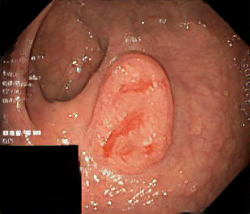

In [19]:
Image.open("/work/vajira/DATA/sinGAN_polyps/singan_out_style_transfered_1_to_1_vgg16/chk_id_605_gen_scale_0_1_img_ST.png")

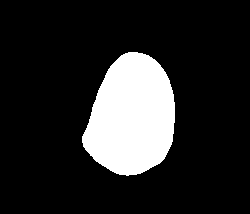

In [20]:
Image.open("/work/vajira/DATA/sinGAN_polyps/singan_out/chk_id_605_gen_scale_0_1_mask.png")

In [23]:
df = pd.read_csv("/work/vajira/DL/singan-polyp-aug-exp/notebooks/FAKE_scale_0_num_img_1_fold_0.csv")

In [ ]:
df

In [37]:
df["image_path"][0].value


AttributeError: 'str' object has no attribute 'value'

In [34]:
ddf =pd.DataFrame(columns=["image_path", "mask_path"])

In [35]:
ddf

,image_path,mask_path


In [51]:
ddf =ddf.append(df)

In [52]:
ddf

,image_path,mask_path
0,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...
1,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...
2,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...
3,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...
4,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...
...,...,...
329,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...
330,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...
331,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...
332,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...,/work/vajira/DATA/sinGAN_polyps/singan_out/chk...


In [54]:
ddf["image_path"][0]

'/work/vajira/DATA/sinGAN_polyps/singan_out/chk_id_1_gen_scale_0_0_img.png'

In [57]:
ddf.iloc[0,0]

'/work/vajira/DATA/sinGAN_polyps/singan_out/chk_id_1_gen_scale_0_0_img.png'